<a href="https://colab.research.google.com/github/JahnaviM737/Data-Science-ML-GRIP/blob/master/T01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 01 : LINEAR REGRESSION
### SUPERVISED LEARNING
By Jahnavi Mulchandani

### GATHERING DATA

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Reading csv data from given source
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(data.describe()) #Metadata
print("\n\n", data.head()) #First 5 rows of the data

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


    Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


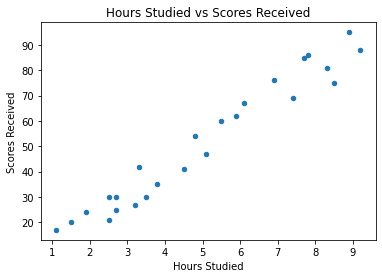

In [20]:
#Visualising the data [scatter plot]
data.plot(x="Hours", y="Scores", kind="scatter")
plt.title("Hours Studied vs Scores Received")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Received")
plt.show()

### PREPARING THE DATA

In [44]:
# Setting X and y variables
# values method converts it into an array
X = data.iloc[:,:-1].values # All rows, all columns till the second to last column
y = data.iloc[:,-1].values # All rows and last column

In [45]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

### TRAINING THE MODEL

In [59]:
# Creating Linear Regressor
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

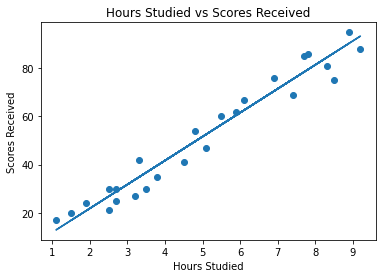

In [60]:
#Plotting Regression Line
line = lin_reg.coef_ * X + lin_reg.intercept_
plt.plot(X,line)
plt.scatter(X, y)
plt.title("Hours Studied vs Scores Received")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Received")
plt.show()

### MAKING PREDICTIONS

In [61]:
#Predicting on test set
y_pred = lin_reg.predict(X_test)
print(pd.DataFrame({'X_test': X_test[:,0], 'y_pred':y_pred})) # X_test is a 2D array

   X_test     y_pred
0     1.5  16.844722
1     3.2  33.745575
2     7.4  75.500624
3     2.5  26.786400
4     5.9  60.588106
5     3.8  39.710582
6     1.9  20.821393


In [65]:
#Predicting scores for given number of hours
hours = [[9.25]]
result = lin_reg.predict(hours)
print(f'Number of Hours : {hours[0][0]} \nPredicted Score : {result[0]}')

Number of Hours : 9.25 
Predicted Score : 93.89272889341652


### EVALUATING THE PERFORMANCE
#### > Mean Absolute Error
#### > Mean Squared Error

In [66]:
# Predicted vs Actual values
df = pd.DataFrame({'X_test': X_test[:,0], 'Y Predicted': y_pred, 'Y Actual': y_test})
print(df)

   X_test  Y Predicted  Y Actual
0     1.5    16.844722        20
1     3.2    33.745575        27
2     7.4    75.500624        69
3     2.5    26.786400        30
4     5.9    60.588106        62
5     3.8    39.710582        35
6     1.9    20.821393        24


In [70]:
# Mean Absolute and Squared Error
from sklearn import metrics
mae = metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
print(f"Mean Absolute Error : {mae}")
print(f"Mean Squared Error : {mse}")

Mean Absolute Error : 4.130879918502482
Mean Squared Error : 20.33292367497996
